## Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ankit7anku","key":"ae48207d658934f55ea3d451bc659859"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

toronto-emotional-speech-set-tess.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = "toronto-emotional-speech-set-tess.zip"
try:
    with ZipFile(file_name, 'r') as zip:
        zip.extractall()
    print('Done')
except Exception as e:
    print(f"Error: {e}")

Done


## Load the Dataset

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_join_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_hurl_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_food_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_pole_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_chair_sad.wav']

In [ ]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad


In [ ]:
df['label'].value_counts()

sad        400
fear       400
happy      400
angry      400
neutral    400
disgust    400
ps         400
Name: label, dtype: int64

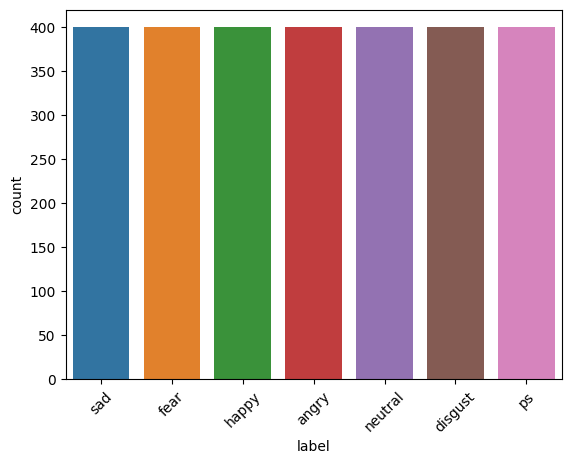

In [ ]:
#sns.countplot(df['label'])

# Assuming 'label' is a categorical column in your DataFrame
sns.countplot(data=df, x='label')

# Optional: To improve the appearance, you can rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()


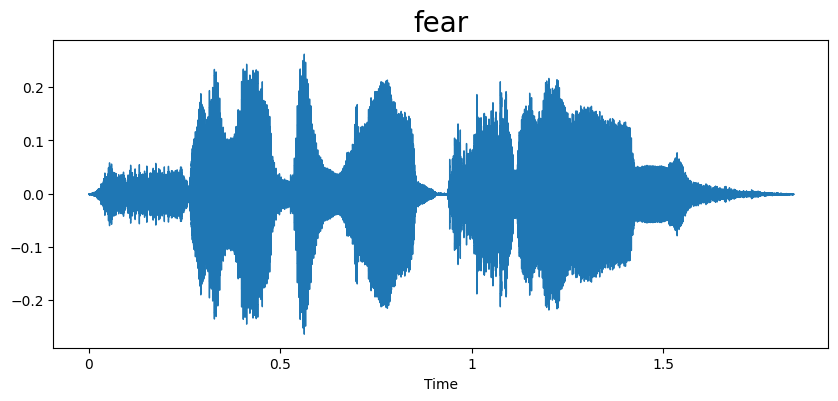

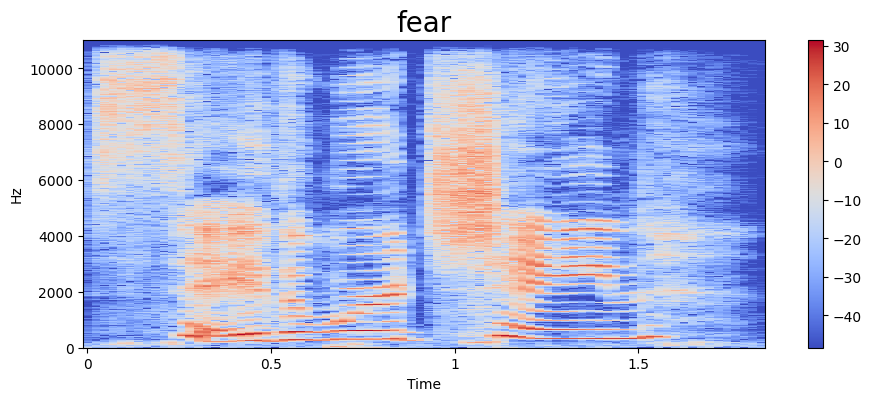

In [ ]:


def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)


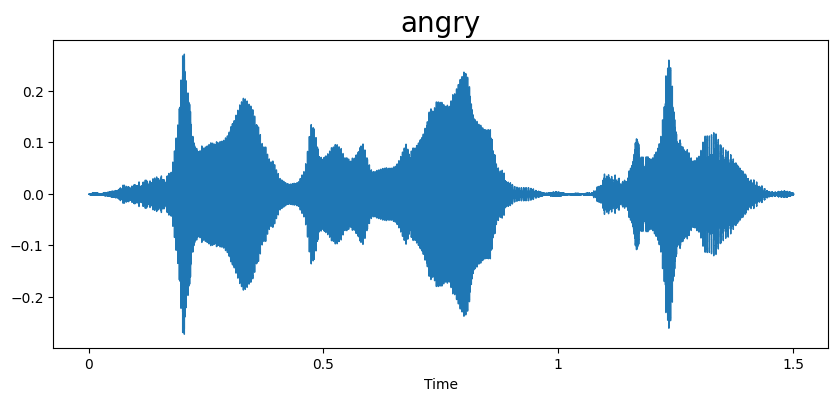

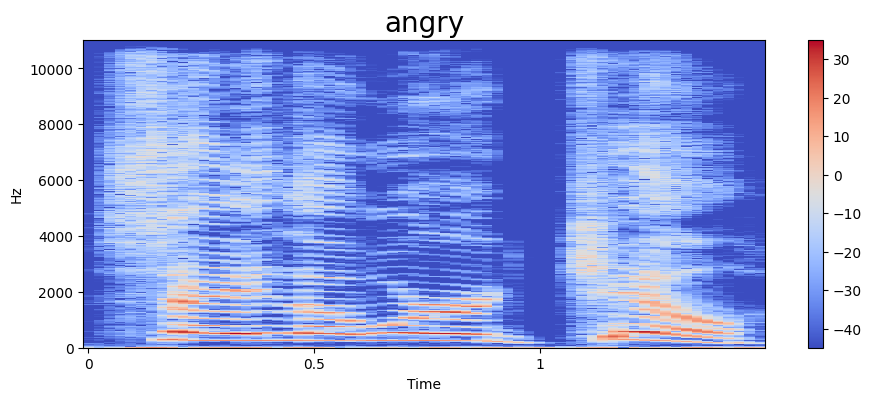

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)



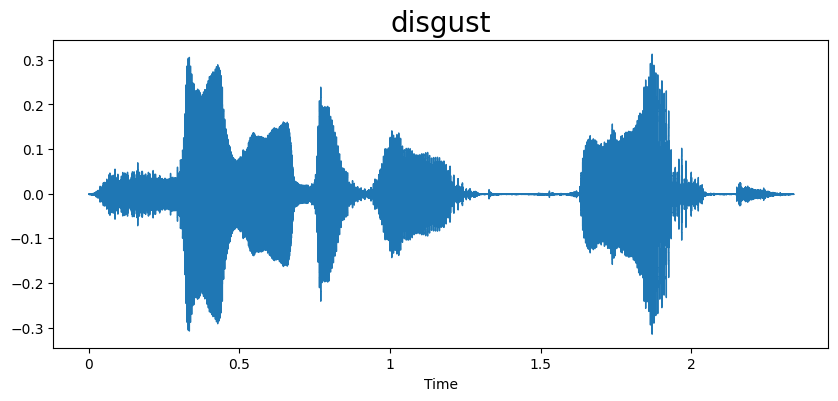

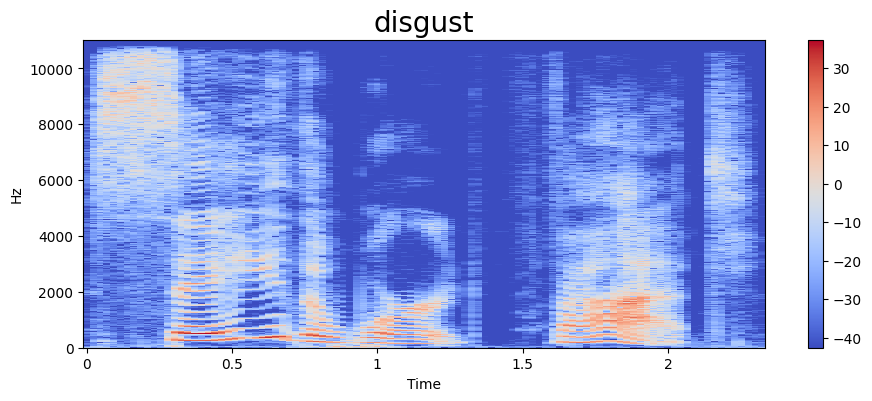

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

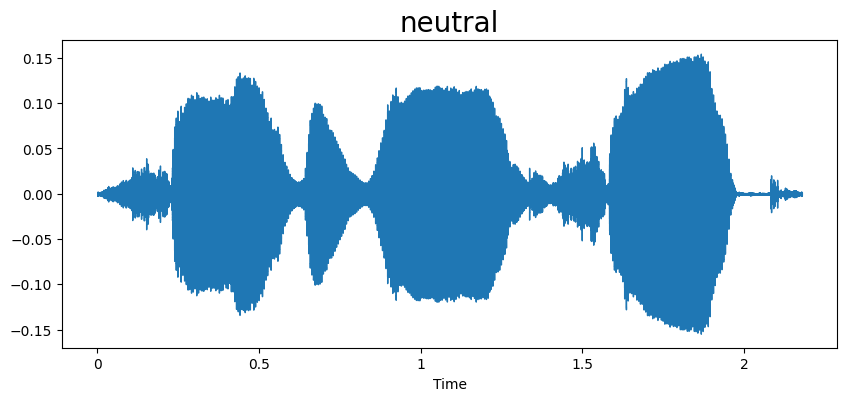

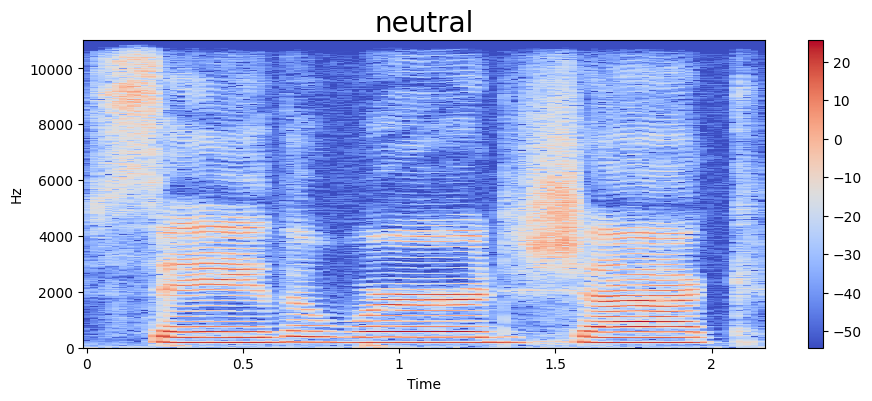

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

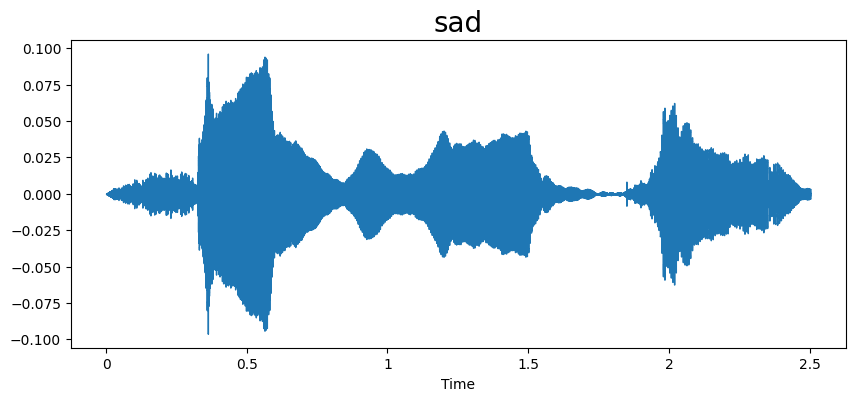

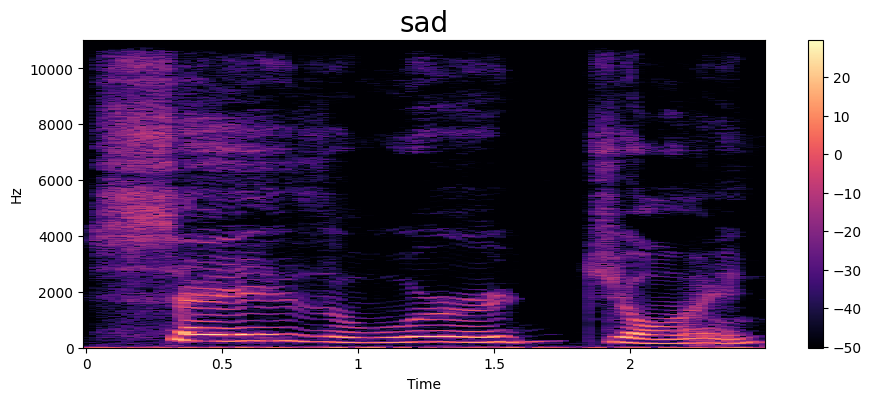

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

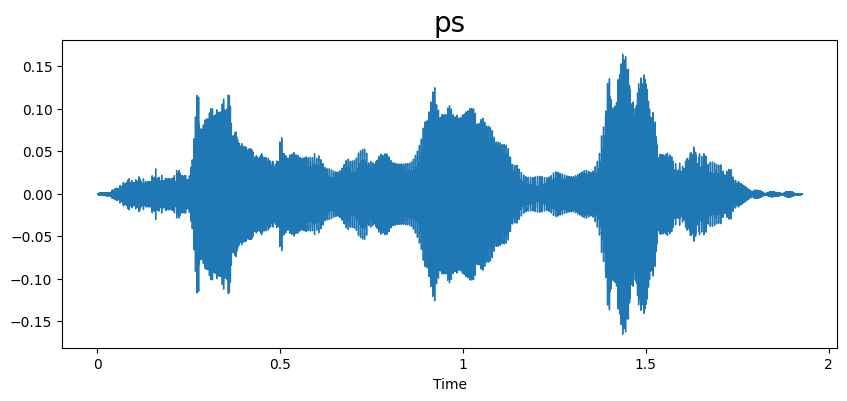

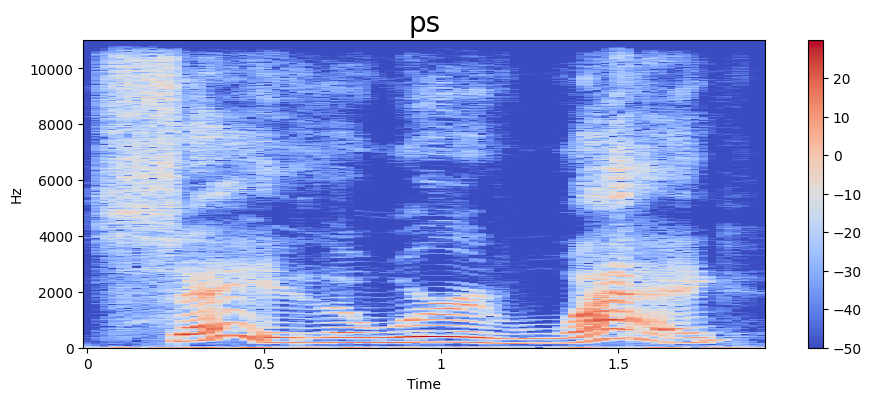

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

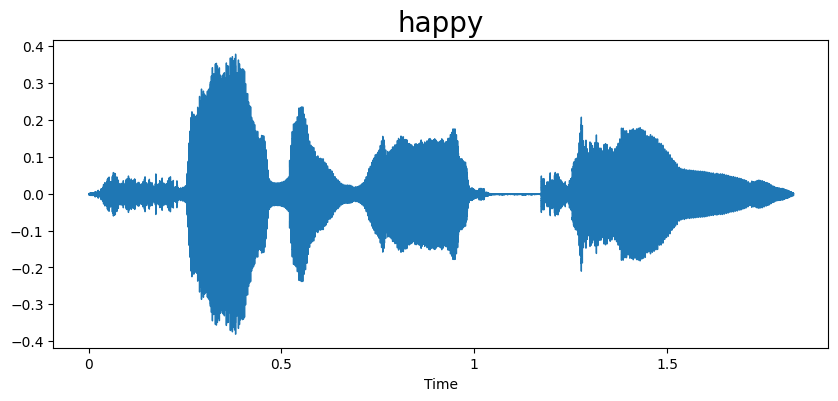

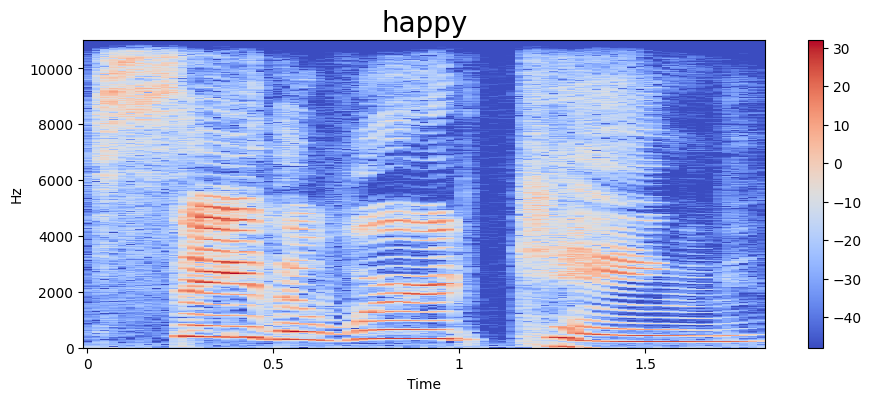

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-5.24505310e+02,  1.01286636e+02,  2.53280010e+01,  1.28700972e+01,
        1.91118641e+01,  7.20743036e+00, -9.18078518e+00, -8.00251675e+00,
       -1.45136576e+01, -3.39531350e+00, -1.18072815e+01, -4.61537743e+00,
       -4.57284641e+00,  1.61381757e+00, -1.02792107e-01, -4.33368778e+00,
        8.98542702e-02, -1.89277315e+00,  2.94813871e+00, -8.55195522e+00,
        4.04444027e+00, -1.45383000e+00, -5.81650877e+00, -4.99961996e+00,
       -9.17881870e+00,  4.19863033e+00, -1.49259210e+00,  3.76722455e+00,
        6.68830061e+00,  5.33556843e+00,  1.70150387e+00,  7.66309214e+00,
        4.19940042e+00,  1.18761606e+01,  1.63807831e+01,  1.72762871e+01,
        1.24731121e+01,  1.09459028e+01,  4.87896585e+00,  9.79107571e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-524.5053, 101.28664, 25.328001, 12.870097, 1...
1       [-504.17932, 144.68796, 23.206753, -11.93723, ...
2       [-548.92944, 98.49536, 32.343082, 12.35841, 26...
3       [-563.7178, 113.82125, 40.814095, 22.508987, 1...
4       [-531.54425, 92.327644, 26.67083, 8.281263, 25...
                              ...                        
2795    [-487.85175, 90.1626, 30.81049, 10.703524, 11....
2796    [-467.38965, 111.97459, 28.372662, 0.89156246,...
2797    [-473.1309, 120.40076, 37.292587, -12.801399, ...
2798    [-473.33392, 100.340515, 32.43094, -17.715473,...
2799    [-458.11108, 106.55501, 23.622692, -22.276268,...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

## Create the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
  #Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 10s 221ms/step - loss: 1.0013 - accuracy: 0.6232 - val_loss: 3.6635 - val_accuracy: 0.1589
Epoch 2/50
35/35 [==============================] - 6s 171ms/step - loss: 0.2684 - accuracy: 0.9103 - val_loss: 4.3038 - val_accuracy: 0.1214
Epoch 3/50
35/35 [==============================] - 7s 203ms/step - loss: 0.1527 - accuracy: 0.9540 - val_loss: 4.7523 - val_accuracy: 0.2875
Epoch 4/50
35/35 [==============================] - 6s 181ms/step - loss: 0.1131 - accuracy: 0.9638 - val_loss: 4.1553 - val_accuracy: 0.2893
Epoch 5/50
35/35 [==============================] - 7s 200ms/step - loss: 0.0938 - accuracy: 0.9714 - val_loss: 4.1595 - val_accuracy: 0.4500
Epoch 6/50
35/35 [==============================] - 6s 181ms/step - loss: 0.0718 - accuracy: 0.9790 - val_loss: 4.6908 - val_accuracy: 0.3071
Epoch 7/50
35/35 [==============================] - 6s 179ms/step - loss: 0.0730 - accuracy: 0.9763 - val_loss: 5.2157 - val_accuracy: 0.3500
Epoch

## Plot the results

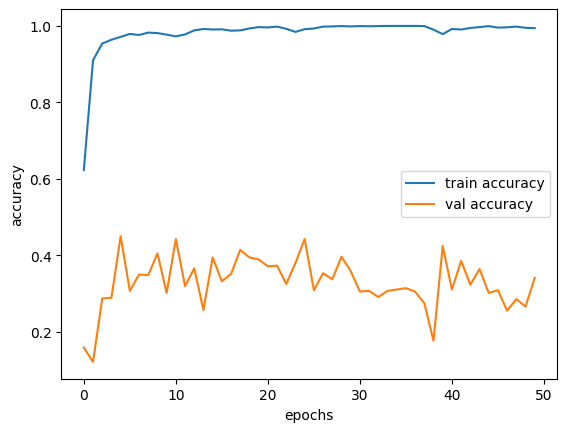

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

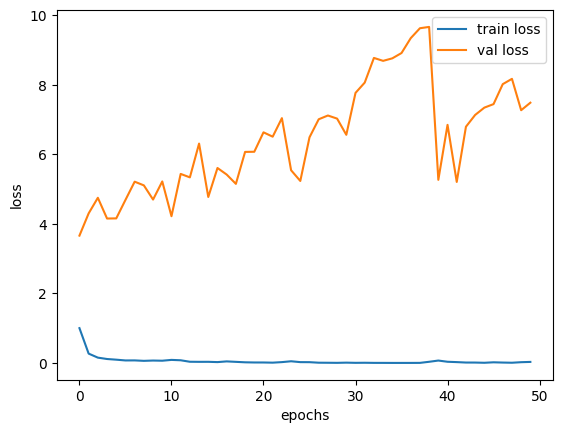

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()